# Integral Calculus

Import of the necessary libraries

In [1]:
import numpy as np # numeric calculation and data analysis library
from matplotlib import pyplot as plt # library for generating graphs from lists or arrays
from sympy import * # Calculation Library
from sympy.plotting import plot as symplot # Library for plots
from sympy.abc import x, y, h # Load a symbolic "x" ,"y" and "h"
from sympy.plotting.pygletplot import PygletPlot as Plot # Library for plots
import math

## Definition of area under a curve

Given the graph of a function, the definite integral can be defined as the area under the function between two values ​​$a$ and $b$.


So for example for the function
$cos(2πx)e^{-x}+1$ between the values ​​$1$ and $4$ can be represented as

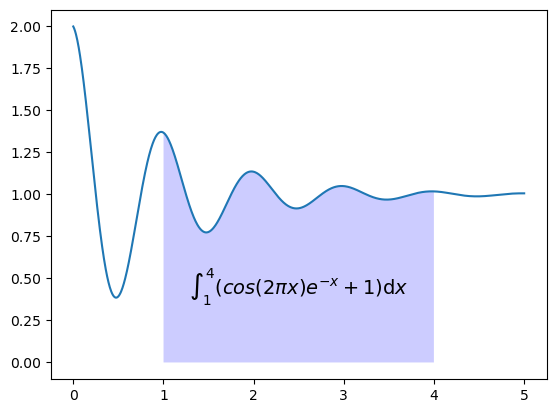

In [3]:
a=0
b=5
n=1000

# We create the symbolic function
f = cos(2*pi*x)*exp(-x)+1
# We define the subintervals between a and b as n evenly spaced values
xvalues = np.linspace(a,b,n)
# We obtain the corresponding values for the y
yvalues = lambdify(x, f)(xvalues)

plt.plot(xvalues,yvalues) # We draw the curve from its x, y coordinates

# fill the integration area in blue
plt.fill_between(xvalues,y1=yvalues,y2=0,where=(xvalues>=1)&(xvalues<=4), facecolor='blue',alpha=0.2)

# Add explanatory text at position (2.5, 0.4)
plt.text(2.5,0.4,r"$\int_{1}^4(cos(2πx)e^{-x}+1)\mathrm{d}x$",horizontalalignment='center',fontsize=14)
plt.show()

One way to calculate an approximation of the area under a curve would be using a finite sum. In this way, the Riemann Sum is defined as an approximation of the value of an integral through a finite sum.

The sum is calculated by dividing the region into shapes (rectangles, trapezoids, squares, quadratic or cubic polynomials, etc.) that if we put them all together, an area similar to the region being measured is formed. Then, by calculating the area for each of these shapes and adding them all together, a numerical approximation for a definite integral can be found.

Keep in mind that the region filled by small shapes is generally not exactly the same shape as the region being measured, so the Riemann sum will be a different approximation of the area being measured. The error that is made can be reduced by using increasingly smaller shapes. Thus, as the shapes become smaller and smaller, the sum approaches the desired integral.

One of the simplest shapes is the rectangle. So, we are going to approximate the area under the curve by a sum of areas of rectangles. To do this, first, we are going to partition the interval $[a, b]$ into $n$ partitions of length $\Delta x$.

To calculate the height of the rectangles we are going to choose two values, the value of the function at the left initial point and the value at the right end point of each element of the partition. These sums of the areas of these rectangles will be called the left sum in one case, and the right sum in the other.

Thus, taking each interval of equal length $\Delta x = \frac{(b-a)}{n}$, with $n$ the number of intervals defined by the partition $\{a=x_1, x_2, \ldots,x_n,x_{n+1}=b\}$, and taking the values ​​of $f(x_{i})$ and $f(x_{i+1})$ respectively as the heights of the rectangles, the areas of the rectangles are obtained.

Now all that remains is to add the areas of the rectangles to obtain an approximation, thus the Left Sum will be

$$L_n = \sum_{i=1}^n \Delta x f(x_{i}) = \Delta x  \sum_{i=1}^n f(x_{i}) = \frac{b-a}{n} \sum_{i=1}^n f(x_{i}),$$

and the Right Sum

$$R_n = \sum_{i=1}^n \Delta x f(x_{i+1}) = \Delta x  \sum_{i=1}^n f(x_{i+1}) = \frac{b-a}{n} \sum_{i=1}^n f(x_{i+1}) $$

This can be implemented in python as follows

The Left Sum of: x**2*sin(x)**2/10**x from 0.00 to 3.14 is 0.089965
The Right Sum of: x**2*sin(x)**2/10**x from 0.00 to 3.14 is 0.089965


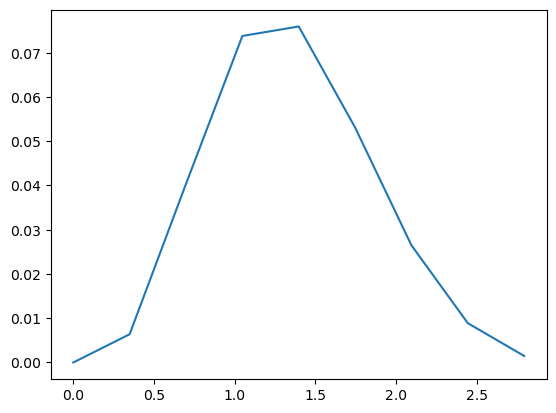

In [10]:
# Function that calculates the left sum where
# function: function to integrate symbolically
# a: lower limit of integration
# b: upper limit of integration
# n: number of intervals between a and b

def L_n(function, a, b, n):
    xvalues = np.linspace(a, b, n) # Returns n values evenly spaced in the interval [a, b]

    # We obtain the values corresponding to f(xi)
    yvalues = lambdify(x, function)(xvalues[:-1])
    
    plt.plot(xvalues[:-1],yvalues)
    
    Ax = (b-a)/n
    Lsum = Ax * sum(yvalues)

    return Lsum

# Function that calculates the right sum
def R_n(function, a, b, n):
    xvalues = np.linspace(a, b, n) # Returns n values evenly spaced in the interval [a, b]

    # We obtain the values corresponding to f(xi+1)
    yvalues = lambdify(x, function)(xvalues[1:])
    
    Ax = (b-a)/n
    Rsum = Ax * sum(yvalues)

    return Rsum

# The following function calls the previous two and returns a tuple with their values
def Riemann_sum(function, a, b, n):
    Ln = L_n(function, a, b, n)
    Rn = R_n(function, a, b, n)
    return (Ln, Rn)

## example
n = 10 #100
a = 0
b = np.pi

function = sin(x)**2 * x**2 * 10**-x
Ln, Rn = Riemann_sum(function, a, b, n)

print(f"The Left Sum of: {function} from {a:.2f} to {b:.2f} is {Ln:.6f}")
print(f"The Right Sum of: {function} from {a:.2f} to {b:.2f} is {Rn:.6f}")

We can also use the trapezoidal rule which consists of approximating the height of the function to a constant in each $[a,b]$ subinterval as if it were a linear polynomial. In this case, the region under the linear polynomial is a trapezoid.

In each sub-interval $x_{i}$ and $x_{i+1}$, the trapezoid has area
$$\frac{f(x_{i})+ f(x_{i+1})}{2}\Delta x $$

And adding these areas in all the sub-intervals we obtain:

$$\int_a^b f(x)dx = \sum_{i=1}^n \frac{f(x_i)+f(x_{i+1})}{2}\Delta x $$

This can be easily implemented in python using the following code

In [11]:
def sum_trapezoidal(function, a, b, n):
    Ax = (b - a)/n
    
    xvalues = np.linspace(a, b, n) # Returns n values evenly spaced in the interval [a, b]

    # We obtain the values of f(xi+1)
    yvalues = lambdify(x, function)(xvalues)

    sumz = 0
    for i in range(len(yvalues)-1):
        sumz += (yvalues[i]+yvalues[i+1])/2
    
    sumz = Ax * sumz
    
    return sumz

n= 10
a = 0
b = np.pi

f = sin(x)**2 * x**2 * 10**-x

STn = sum_trapezoidal(f, a, b, n)
print(f"The Trapezoidal Sum of: {f} from {a} to {b:.2f} is {STn:.6f}")

The Trapezoidal Sum of: x**2*sin(x)**2/10**x from 0 to 3.14 is 0.089965


## Calculation of integrals in Python

To calculate definite integrals, the *scipy* library provides an immediate calculation command *quad*. This command returns a tuple whose first element is the value of the integral and has the following syntax
*quad(function, a, b)*

In [12]:
# scipy is a library of mathematical tools and algorithms, including quad to calculate integrals
# It DOES NOT accept simbolic functions so use lambdas or clasical functions
from scipy.integrate import quad

a=0
b=3
J = quad(lambda x: x**2+x+1,a,b)
J # Tuple integral value and absolute error

(16.5, 1.8318679906315083e-13)

With Python, indefinite integrals can be solved symbolically with the help of the *SymPy* library. To do this, we are going to use the *integrate* object whose syntax is the following: *integrate(function, variable)*.

In [13]:
from sympy import integrate

fx = x**3-6*x # Creating the symbolic function

dx1 = integrate(fx,x)
display(dx1)

fx2 = x**2-3*x + 2
dx2 = integrate(fx2)
display(dx2)

x**4/4 - 3*x**2

x**3/3 - 3*x**2/2 + 2*x

The function *Integral* gives the same result

In [14]:
from sympy import Integral

fx = x**3-6*x
dx1 = Integral(fx,x).doit()
display(dx1)

fx2 = x**2-3*x+2
dx2 = Integral(fx2).doit()
display(dx2)

dx3 = Integral(x**2-3*x+2).doit()
display(dx3)

x**4/4 - 3*x**2

x**3/3 - 3*x**2/2 + 2*x

x**3/3 - 3*x**2/2 + 2*x

In *SymPy*, integrals defined by the *integrate* functions can also be calculated, considering the fact that integration limits must be added:

-27/4

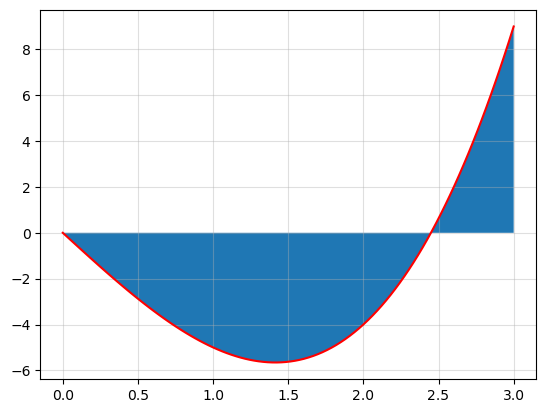

In [15]:
from sympy import integrate

fx = x**3-6*x

Id2 = integrate(fx,(x,0,3))
display(Id2)

xx = np.linspace(0,3,100)
yy = lambdify(x,fx)(xx)

plt.grid(alpha=0.4)
plt.plot(xx,yy,'r')
plt.fill_between(xx,yy)
plt.show()

When the expression to be integrated includes more than one symbolic variable, it is necessary to explicitly specify the variable with respect to which it is integrated, otherwise Python will show us an error.

In [16]:
from sympy.abc import a,b,c
from sympy import integrate

f = a*x**2+b*x+c
integrate(f,x)

a*x**3/3 + b*x**2/2 + c*x

## Multiple Integrals

Although double integrals will be solved, the syntax and methodology can be easily extrapolated to any multiple integral.

To resolve
$$ \int_a^b \int_c^d 1 \ dy dx,$$

It must be remembered that this type of double integrals can be solved iteratively
$$ I_1 = \int_c^d 1 \ dy  \Rightarrow I = \int_a^b I_1 dx.$$

In Python you can do exactly the same thing

In [11]:
from sympy.abc import x,y,z,a,b,c,d
from sympy import simplify

I1 = integrate(1, (y,c,d))
simplify(integrate(I1, (x,a,b)))

(a - b)*(c - d)

There are also functions for calculating double, triple or multiple integrals. The mechanics for this type of integration have been grouped into the functions *dblquad, tplquad* and *nquad*. It should be noted that the limits of all internal integrals must be defined as functions.

The general syntax of the *dblquad* function is *dblquad(func, a, b, gfun, hfun)*. Where, *func* is the name of the function to be integrated, *a* and *b* are the lower and upper limits of the variable *x*, respectively, while *gfun* and *hfun* are the names of the functions that define the lower and upper limits of the variable *y*.

As an example, let's look at the calculation of the double integral
$$\int_{0}^{1/2}\int_{0}^{\sqrt{1-4y^2}} 16xy \:dx dy$$

In [18]:
from scipy.integrate import dblquad

i = dblquad(lambda x,y: 16*x*y, 0, 0.5, 0, lambda y: sqrt(1-4*y**2))
print(i)

(0.5, 1.7092350012594845e-14)


## Exercises

### Exercise 1
Given the functions:

* $f(x)=x^2-2x+3$ in $[-2, 3]$
* $f(x)=sen(2x)$ in $[-1, 5]$
* $f(x)=-x^2+8x+5$ in $[-2, 3]$

Do:
1. The left sum value $Ln$ for $n=6$
2. The right sum value $Rn$ for $n=6$
3. The value of the trapezoidal sum STn for $n=6$
4. Exact value of the integral (use the *quad* function)
5. The relative error (Actual value minus approximate value and divided by the actual value) for the three approximations.

Resultado de 1) y 2)
Suma izquierda: 20.8333, suma derecha: 16.6667
Suma izquierda: -0.1004, suma derecha: 0.2649
Suma izquierda: 12.5000, suma derecha: 41.6667
Resultado de 3)
Suma trapezoidal: 18.7500
Suma trapezoidal: 0.0822
Suma trapezoidal: 27.0833
Resultado de 4)
Integral con quad: 21.6667
Integral con quad: 0.2115
Integral con quad: 33.3333
Resultado de 5)
f1
Error relativo con izq.: 0.0385
Error relativo con der.: 0.2308
Error relativo con tra.: 0.1346
f2
Error relativo con izq.: 1.4749
Error relativo con der.: -0.2525
Error relativo con tra.: 0.6112
f3
Error relativo con izq.: 0.6250
Error relativo con der.: -0.2500
Error relativo con tra.: 0.1875


### Exercise 2 (Simpson's Rule)

Simpson's rule consists of approximating the integral of a $f$ function with quadratic polynomials. Thus, given a partition $p$ of the interval $[a, b]$ for some even number $n$. On each subinterval, the area under $f$ is approximated with the area under a quadratic polynomial:
$$[ f(x_{i-1})+4f(x_{i})+f(x_{i+1}) ]\frac{\Delta x}{3} $$

Adding these areas for all the subintervals we obtain the approximation of the integral:
$$\int_a^b f(x)dx =\sum_{i=2}^{n-1} [f(x_{i-1})+4f(x_{i})+f(x_{i+1})]\frac{\Delta x}{3}  = [f(x_{0})+4f(x_{1})+2f(x_{2})+4f(x_{3})+2f(x_{4})+...+4f(x_{n-1})+f(x_{n})]\frac{Δx}{3}$$

Implement Simpson's Rule in Python and test it for the functions in exercise 1.

Metodo 1
21.651683501683507
0.18656882638835265
33.66750841750842
Metodo 2
21.155007992381723
0.23886197018946814
32.00256776519402


### Exercise 3
Calculate:

1. $\int e^{4x} dx$
2. $\int x^{5} \log x dx$
3. $\int \cos (\sin x) dx$
4. $\int_{-1}^{1} x^2 \ dx$
5. $\int_{-\pi}^{\pi} \cos(x) \ dx$
6. $\int_{4}^{\infty} \frac{1}{x^2-5x+4} \ dx$

1)


exp(4*x)/4


2)


x**6*log(x)/(6*log(10)) - x**6/(36*log(10))


3)


Integral(cos(sin(x)), x)


4)


2/3


5)


0


6)


oo

### Exercise 4

Let $f(x)=x$ and $g(x)=(x+1)^2$, calculate:

1. $\int_{0}^{2} (f+g) dx$
2. $\int_{0}^{2} f \ dx + \int_{0}^{2} g \ dx$

Compare the results.

32/3

32/3

### Exercise 5

Let $f(x)=\sin x$ and $k=5$, calculate:

1. $\int_{-\pi/2}^{\pi} k \ f \ dx$
2. $k \int_{-\pi/2}^{\pi} f \ dx $

Compare the results.

5

5

### Exercise 6

Calculate the area of ​​the region bounded by the following graphs using Simpson's method with $\Delta x = (b-a)/n = 0.01$.
1. $y = x + 1$, with $0 \leq x \leq 1$
2. $y = x^2 + 1$, with $1 \leq x \leq 2$

Simpson: 1.4983501683501688
Exacta: 3/2


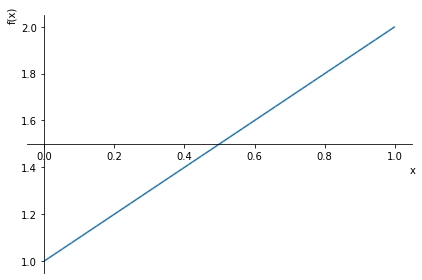

Simpson: 3.333400673400673
Exacta: 10/3


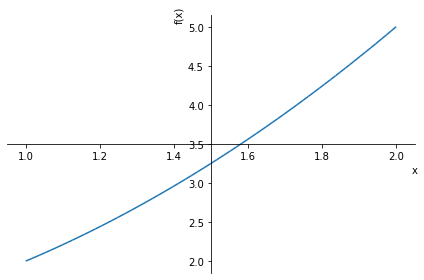

### Exercise 7

Calculate the volume of the solid of revolution generated by rotating the following graphs around the $x$ axis. As in the previous exercise, use Simpson's method with $\Delta x = (b-a)/n = 0.01$ to obtain the corresponding definite integral.

1. $y = \sqrt{x-1}$, the line $x=3$ and the ordinate axis.
2. $y = 1-x^2$, and the lines $x=-1$ and $x=1$.

Integral por revolución: 4.712389, Simpson: 5.933310
Integral por revolución: 3.351032, Simpson: 4.167741


<string>:2: RuntimeWarning: invalid value encountered in sqrt


### Exercise 8

Calculate:
1. The double integral $\iint \limits_{\mathbb{R}^{2}} \frac{x^2}{2y} dxdy$, with $1 \leq x \leq 2$ and $1 \leq y \leq 4$
2. The triple integral $\iiint \limits_{\mathbb{Q}}  x^2 \sin(z) dxdydz$, with $0 \leq x \leq \sqrt{5}$, $0 \leq y \leq 2\pi$ and $0 \leq z \leq \arctan 2$
3. The double integral $\iint \limits_{\mathbb{R}^{2}} xy dydx$, with $0 \leq x \leq 1$ and $1-x \leq y \leq 1-x^2$
4. The double integral $\iint \limits_{\mathbb{R}^{2}} (x+y^3) dydx$, with $1 \leq x \leq 4$ and $x \leq y \leq x^2$
5. The double integral $\iint \limits_{\mathbb{R}^{2}} dydx$, with $-1 \leq x \leq 3$ and $0 \leq y \leq x+2$
6. Calculate the volume under the surface $f(x,y) = 6-x-y$ in the rectangle $[0, 3] \times [0, 2]$
7. Calculate the volume under the surface $f(x,y) = 6-x-y$ in the area of ​​the plane $XY$ bounded by $0 \leq x \leq 1$ and $2x\leq y \leq -x^2+3$

1)


35/4


2)


-10*pi/3 + 10*sqrt(5)*pi/3


3)


1/24


4)


145467/20


5)


12


6)


21


7)


389/60

### Exercise 9

Given the function $ f(x,y)=x^2+4y^2$, we ask to:

1. Represent the graph of the function in the rectangle $[0, 2] \times [0, 1]$
2. Calculate the volume of the solid limited by the rectangle $[0,2] \times [0,1]$ using a double integral.

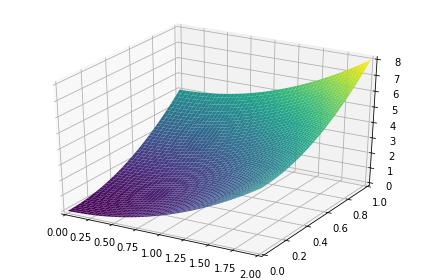

16/3